In [50]:
#importaciones
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_error

import matplotlib.dates as mdates

# regresion lineal

In [19]:
#ensayo de que es un modelo de regresion lineal funcionando
reg = linear_model.LinearRegression()

reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2]) 
reg.coef_ 
reg.intercept_
reg.predict([[3, 3]])



array([3.])

# Ejemplo de regresion lineal con dataframe housing

In [49]:
# importar el dataframe housing
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
            header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Ejemplo de regresion lineal con dataframe del baloto

In [55]:
#importa dataframe
df = pd.read_csv('Baloto.csv')
df.columns = ['fecha', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6']
df.head()

,fecha,b1,b2,b3,b4,b5,b6
0,30.09.2023,10,15,19,21,41,10
1,27.09.2023,2,20,25,36,41,11
2,23.09.2023,13,20,24,30,42,12
3,20.09.2023,2,3,10,21,23,14
4,16.09.2023,6,29,32,39,43,16


In [22]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fecha   2333 non-null   object
 1   b1      2333 non-null   int64 
 2   b2      2333 non-null   int64 
 3   b3      2333 non-null   int64 
 4   b4      2333 non-null   int64 
 5   b5      2333 non-null   int64 
 6   b6      2333 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 127.7+ KB


In [23]:
#nulls
df.isnull().sum()

fecha    0
b1       0
b2       0
b3       0
b4       0
b5       0
b6       0
dtype: int64

In [24]:
df.dtypes

fecha    object
b1        int64
b2        int64
b3        int64
b4        int64
b5        int64
b6        int64
dtype: object

In [25]:
df['fecha']

0       30.09.2023
1       27.09.2023
2       23.09.2023
3       20.09.2023
4       16.09.2023
           ...    
2328    24.02.2001
2329    17.02.2001
2330    10.02.2001
2331    03.02.2001
2332    27.01.2001
Name: fecha, Length: 2333, dtype: object

In [26]:
# %% Convertir la columna 'Fecha' a datetime
# Asegúrate de que el formato coincida exactamente con tus fechas ('dd.mm.yyyy')
try:
    df['fecha'] = pd.to_datetime(df['fecha'], format='%d.%m.%Y')
except ValueError as e:
    print(f"Error al convertir fechas: {e}")
    print("Verifica que TODAS las fechas en la columna 'Fecha' tengan el formato 'dd.mm.yyyy'.")
    # Intenta inferir el formato si el especificado falla (menos fiable)
    # df['Fecha_dt'] = pd.to_datetime(df['Fecha'], infer_datetime_format=True)

# Convertir la fecha datetime a un número ordinal para la regresión
# El número ordinal representa el número de días desde una fecha de referencia (año 1, día 1)
df['fecha'] = df['fecha'].apply(lambda date: date.toordinal())

print("\nDataFrame con fechas convertidas:")

df.info() # Verifica los tipos de datos


DataFrame con fechas convertidas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   fecha   2333 non-null   int64
 1   b1      2333 non-null   int64
 2   b2      2333 non-null   int64
 3   b3      2333 non-null   int64
 4   b4      2333 non-null   int64
 5   b5      2333 non-null   int64
 6   b6      2333 non-null   int64
dtypes: int64(7)
memory usage: 127.7 KB


In [10]:
# Intentar convertir la columna 'fecha' directamente a tipo datetime, manejar posibles errores
df["fecha"] = pd.to_datetime(df["fecha"], format="%Y-%m-%d", errors="coerce")


In [12]:
print(df["fecha"].isna().sum())  # Cantidad de valores no convertidos


2333


In [27]:
# imprimir las filas con valores nulos en la columna 'fecha'
print(df[df["fecha"].isna()])

Empty DataFrame
Columns: [fecha, b1, b2, b3, b4, b5, b6]
Index: []


In [14]:
# Elimina las filas con valores nulos en la columna 'fecha'
df = df.dropna(subset=["fecha"])

In [15]:
# Crear una nueva columna con los días transcurridos desde el primer día
df["dias"] = (df["fecha"] - df["fecha"].min()).dt.days


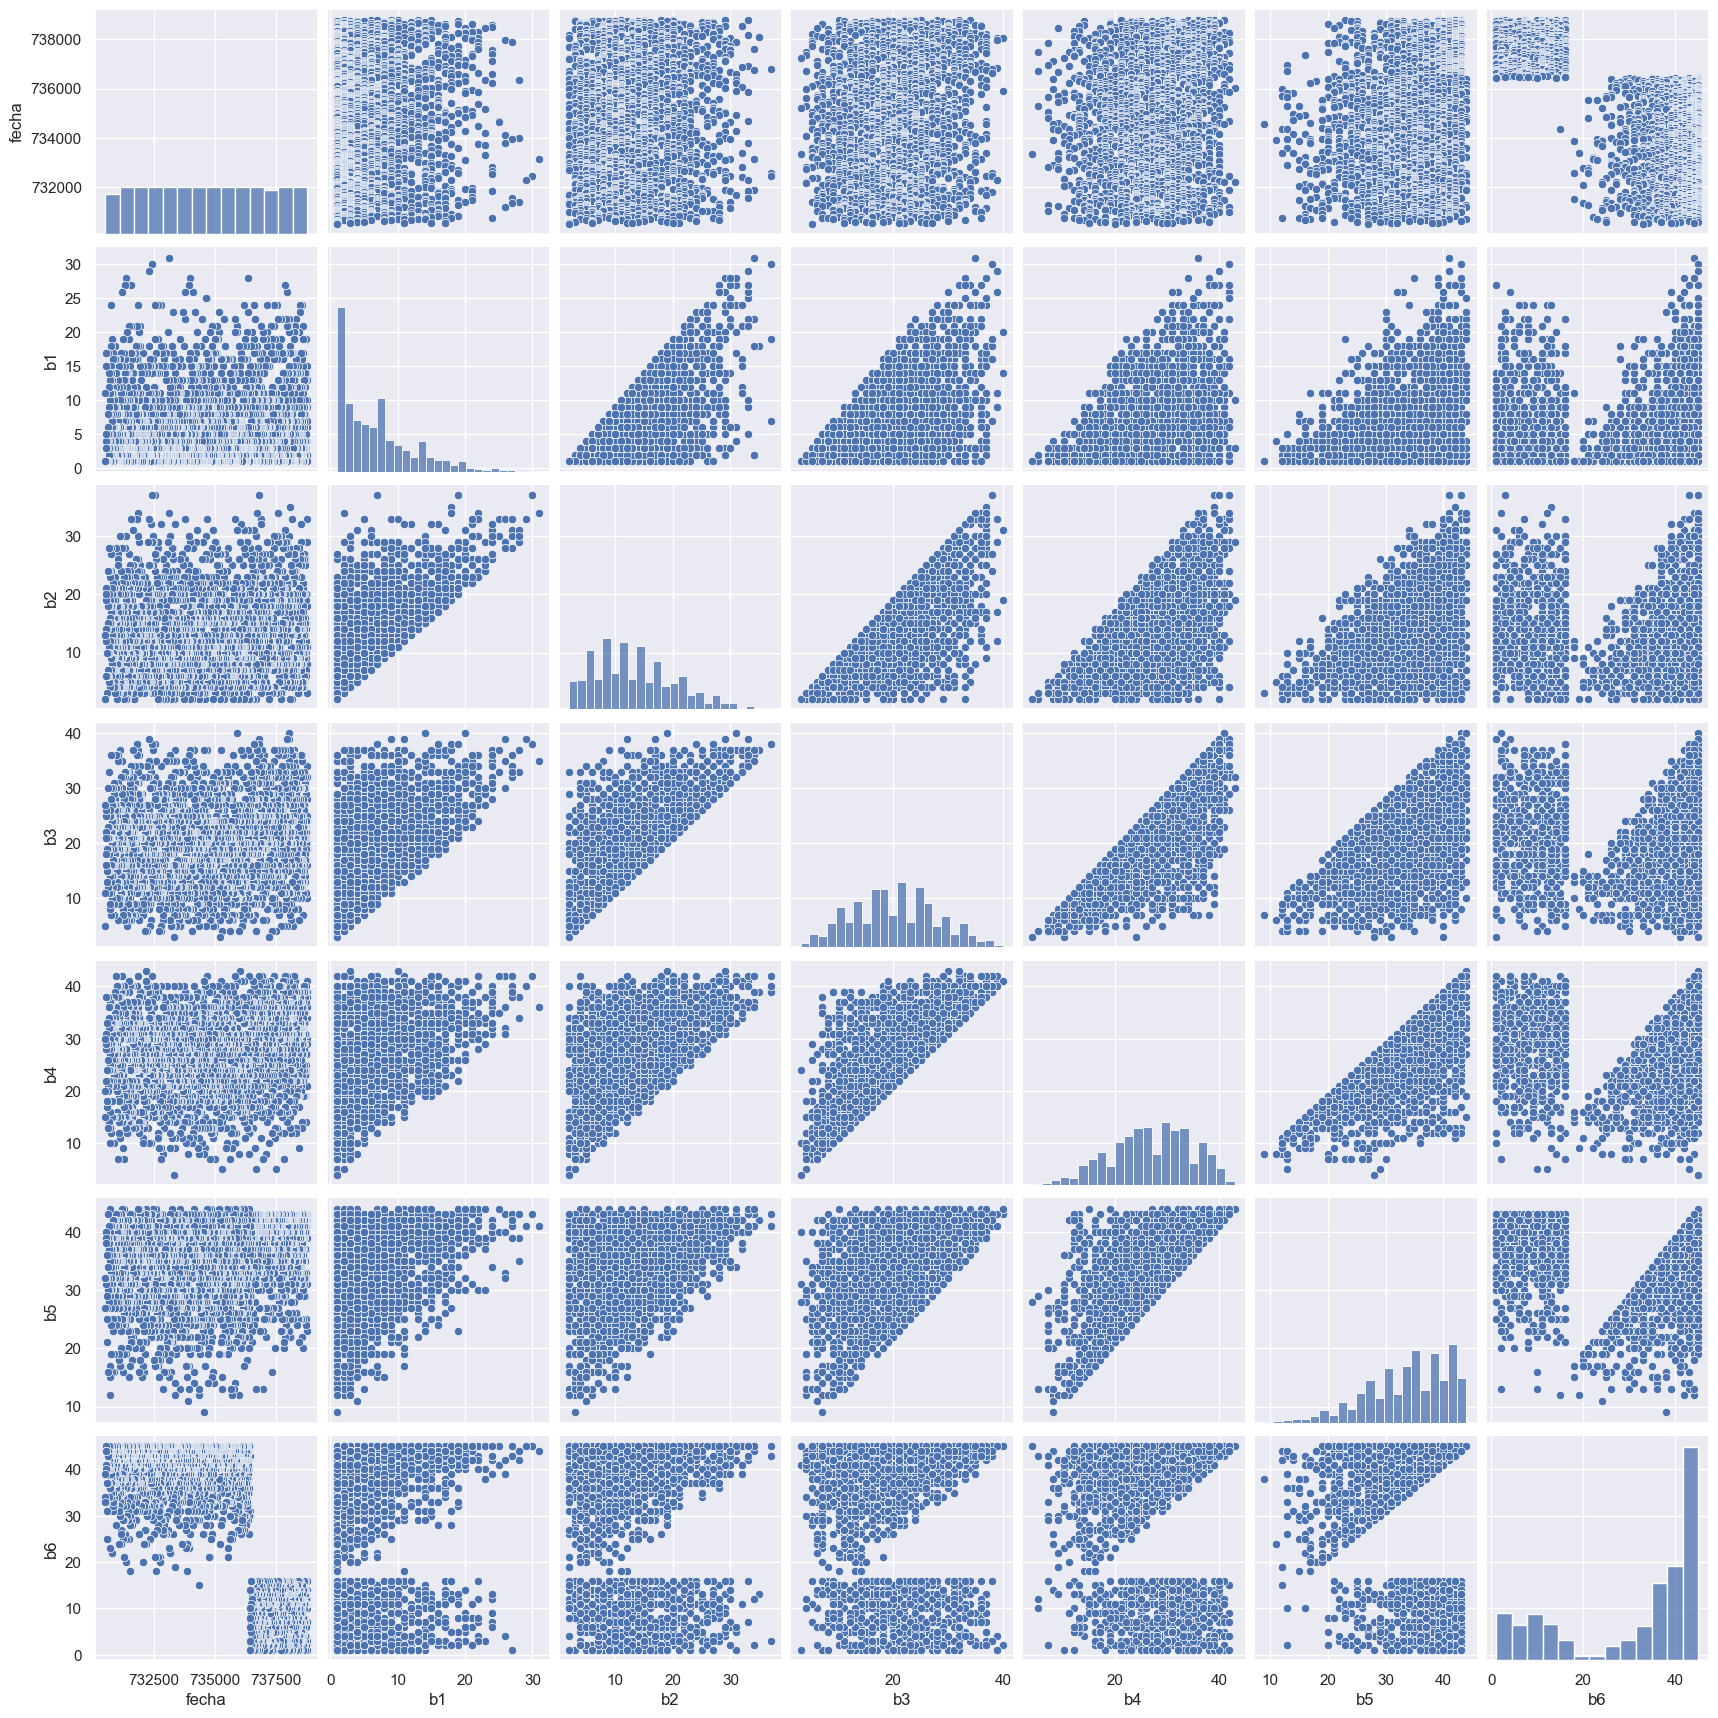

In [28]:
# pairplot de las balotas
sns.pairplot(df) # Call pairplot from seaborn library

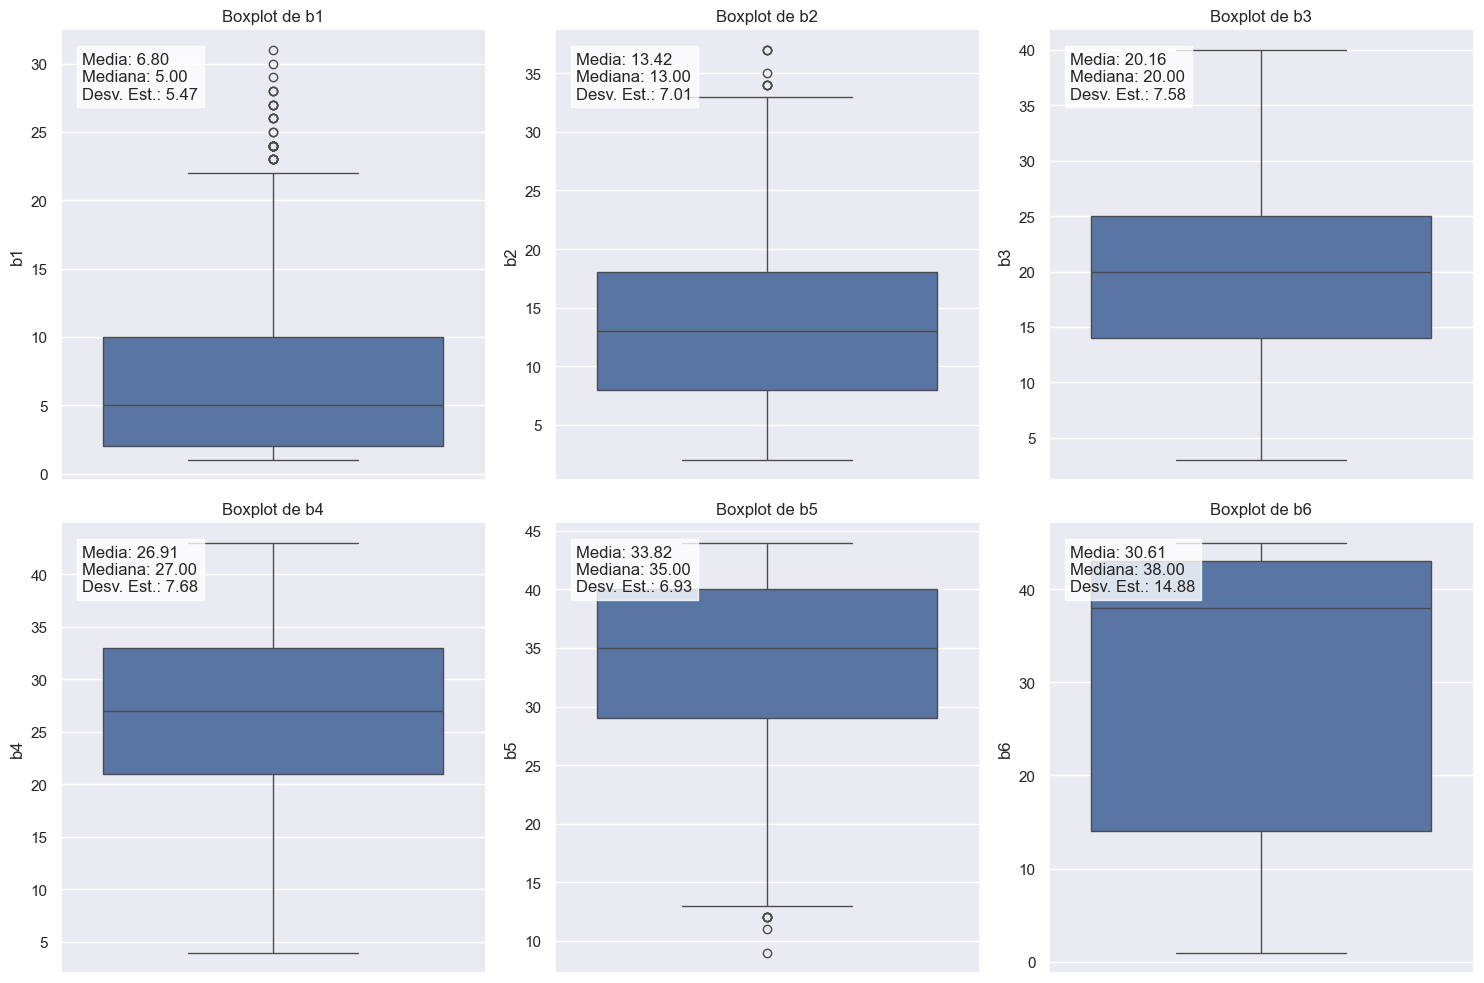

In [56]:
# Crear una figura con subplots de las balotas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 filas, 3 columnas
axes = axes.flatten()  # Aplanar el array de axes

#from pypalettes import get_hex
sns.set_theme(style="darkgrid")
#palette = get_hex("Acadia", keep_first_n=3)

# Lista de columnas para los boxplots
columnas = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6']

# Iterar sobre las columnas y crear los boxplots
for i, columna in enumerate(columnas):
    sns.boxplot(y=df[columna], ax=axes[i])  # Cambiar a 'y' para boxplots verticales
    axes[i].set_title(f'Boxplot de {columna}')

    # Calcular y mostrar estadísticas
    stats = df[columna].describe()
    stats_str = f"Media: {stats['mean']:.2f}\nMediana: {stats['50%']:.2f}\nDesv. Est.: {stats['std']:.2f}"
    axes[i].text(0.05, 0.95, stats_str, transform=axes[i].transAxes,
                 verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

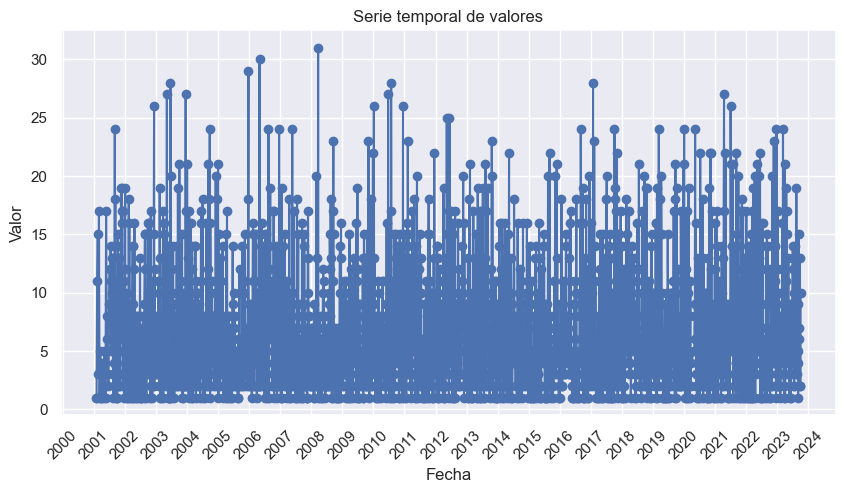

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Supongamos que ya tienes tu DataFrame `df` y tus columnas son 'b1' (fecha) y 'valor'

# 1. Convertir la columna de fechas al tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%d.%m.%Y')

# 2. Ordenar por fecha (opcional pero recomendable)
df = df.sort_values(by='fecha')

# 3. Graficar
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df['fecha'], df['b1'], marker='o')  # Asegúrate que 'valor' exista

# 4. Configurar el eje X con fechas legibles
ax.xaxis.set_major_locator(mdates.YearLocator())  # Ticks cada año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato año

# Rotar las etiquetas del eje X para legibilidad
plt.xticks(rotation=45)

# Etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie temporal de valores')

plt.tight_layout()
plt.show()


<Axes: xlabel='fecha', ylabel='b1'>

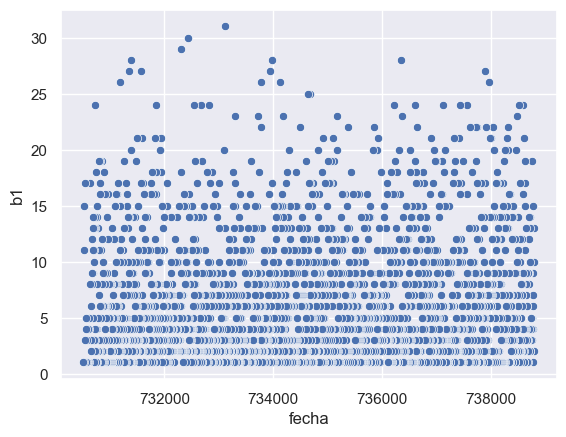

In [30]:

sns.scatterplot(x=df['fecha'], y=df['b1'])

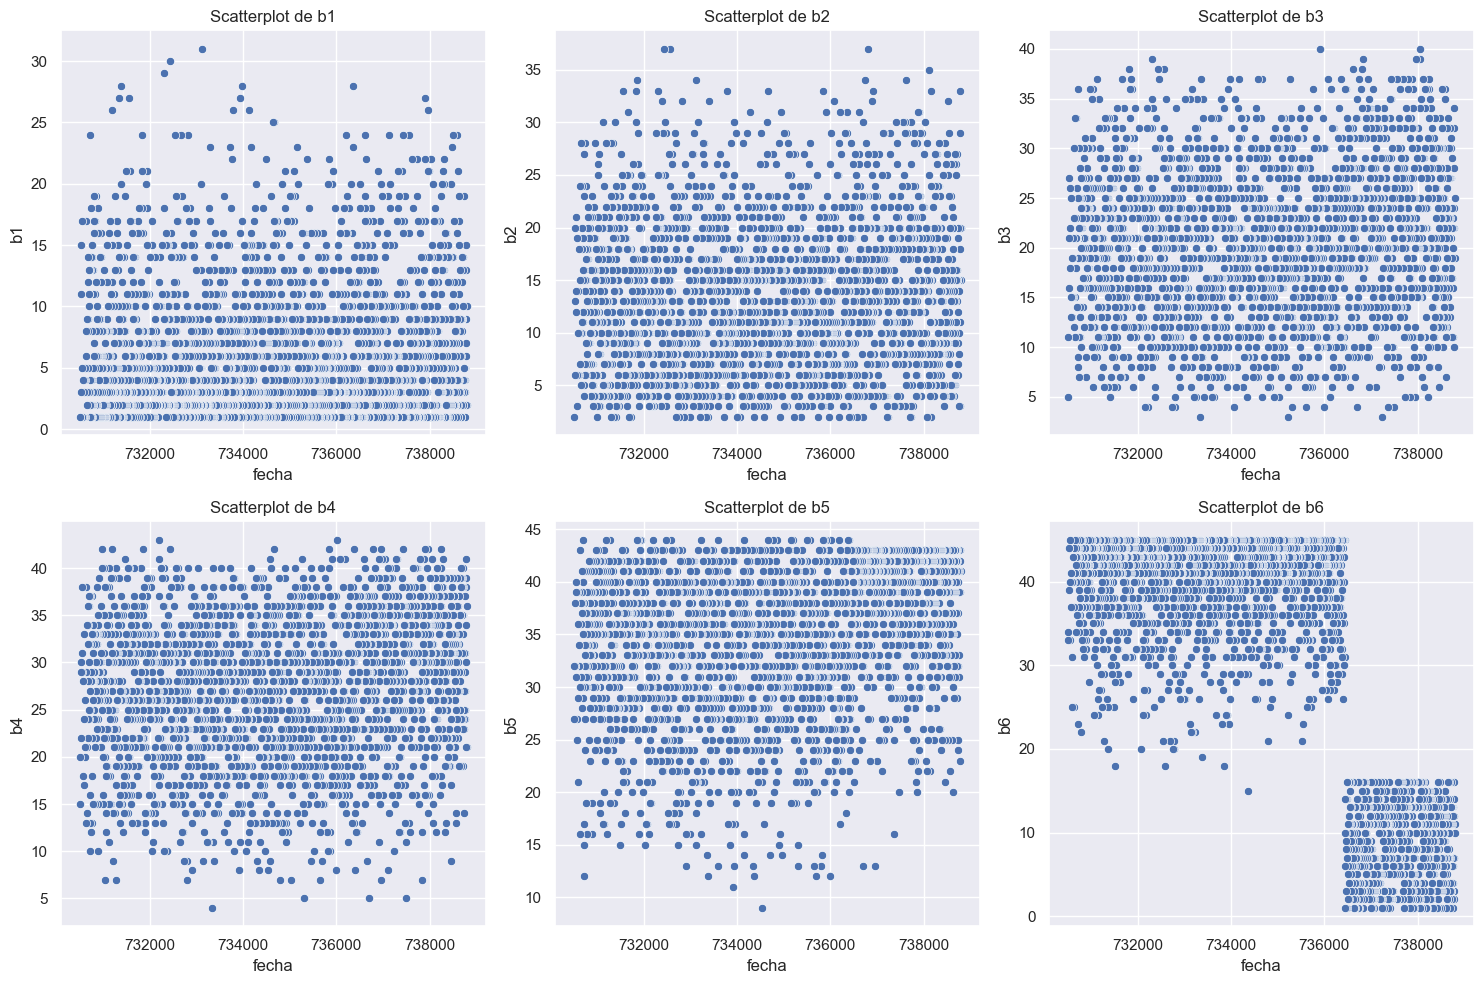

In [31]:
# Crear una figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 filas, 3 columnas
axes = axes.flatten()  # Aplanar el array de axes

# Lista de columnas para los scatterplots
columnas = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6']

# Iterar sobre las columnas y crear los scatterplots
for i, columna in enumerate(columnas):
    # sns.scatterplot(x=df.index, y=df[columna], ax=axes[i]) # Usar índice como eje x
    sns.scatterplot(x=df['fecha'], y=df[columna], ax=axes[i]) #Usar Fecha como eje X

    axes[i].set_title(f'Scatterplot de {columna}')


# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

## Regresion Lineal con b1 contra fcha

In [32]:
# definir y y x para el modelo de regresion lineal
y = df['b1']
x = df['fecha']


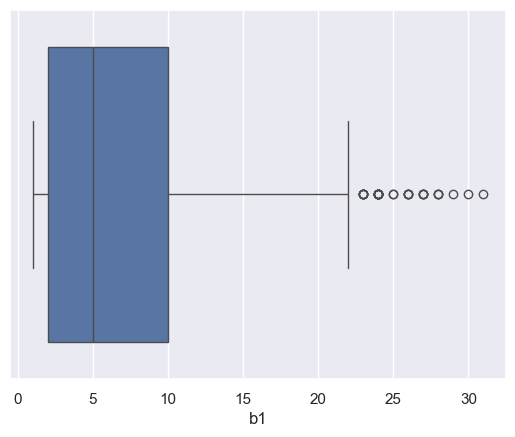

In [48]:
# bo
sns.boxplot(x=df['b1'])
plt.show()

In [33]:
# transformar el vector de b1 en un dataframe
seriey = pd.Series(y) # convierte el vector en una serie
y =seriey.to_frame() # convierte la serie en un dataframe

In [34]:
# transformar el vector de fecha en un dataframe
seriex = pd.Series(x)
x = seriex.to_frame()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

modelo_b1 = LinearRegression()


In [36]:
# Ajustar el modelo
modelo_b1.fit(X_train, y_train)

LinearRegression()

In [41]:
#predicciones
y_pred_b1 = modelo_b1.predict(X_test)


In [42]:
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred_b1))
print("Coeficiente de determinación: ", r2_score(y_test, y_pred_b1))

Error cuadrático medio:  29.134919645544635
Coeficiente de determinación:  0.0007159656989551566


In [43]:

print("Coeficientes del modelo: ", modelo_b1.coef_)
print("Intercepto del modelo: ", modelo_b1.intercept_)
print("R^2 del modelo: ", modelo_b1.score(X_test, y_test))


Coeficientes del modelo:  [[9.28828846e-05]]
Intercepto del modelo:  [-61.45668448]
R^2 del modelo:  0.0007159656989551566


In [44]:
y_pred_b1 = modelo_b1.predict(X_test)

print("Coeficientes del modelo: ", modelo_b1.coef_)
print("Intercepto del modelo: ", modelo_b1.intercept_)
print("R^2 del modelo: ", modelo_b1.score(X_test, y_test))
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred_b1))
print("Coeficiente de determinación: ", r2_score(y_test, y_pred_b1))

Coeficientes del modelo:  [[9.28828846e-05]]
Intercepto del modelo:  [-61.45668448]
R^2 del modelo:  0.0007159656989551566
Error cuadrático medio:  29.134919645544635
Coeficiente de determinación:  0.0007159656989551566


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def visualizar_datos(X, y):
    """
    Función para visualizar los datos y detectar valores atípicos
    
    Args:
        X: Variables predictoras
        y: Variable objetivo
    """
    # Crear figura con subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # 1. Gráfico de dispersión
    axes[0,0].scatter(X, y, alpha=0.5)
    axes[0,0].set_title('Gráfico de Dispersión')
    axes[0,0].set_xlabel('X')
    axes[0,0].set_ylabel('y')
    
    # 2. Boxplot de y
    axes[0,1].boxplot(y)
    axes[0,1].set_title('Boxplot de y')
    axes[0,1].set_ylabel('Valores')
    
    # 3. Histograma de y
    axes[1,0].hist(y, bins=30)
    axes[1,0].set_title('Histograma de y')
    axes[1,0].set_xlabel('Valores')
    axes[1,0].set_ylabel('Frecuencia')
    
    # 4. Gráfico de residuos
    from sklearn.linear_model import LinearRegression
    modelo = LinearRegression()
    modelo.fit(X.reshape(-1,1), y)
    y_pred = modelo.predict(X.reshape(-1,1))
    residuos = y - y_pred
    axes[1,1].scatter(y_pred, residuos, alpha=0.5)
    axes[1,1].axhline(y=0, color='r', linestyle='--')
    axes[1,1].set_title('Gráfico de Residuos')
    axes[1,1].set_xlabel('Valores Predichos')
    axes[1,1].set_ylabel('Residuos')
    
    plt.tight_layout()
    plt.show()
    
    # Calcular estadísticas descriptivas
    print("\nEstadísticas descriptivas de y:")
    print(f"Media: {np.mean(y):.2f}")
    print(f"Mediana: {np.median(y):.2f}")
    print(f"Desviación estándar: {np.std(y):.2f}")
    print(f"Valor mínimo: {np.min(y):.2f}")
    print(f"Valor máximo: {np.max(y):.2f}")
    
    # Detectar valores atípicos usando el método IQR
    Q1 = np.percentile(y, 25)
    Q3 = np.percentile(y, 75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    valores_atipicos = y[(y < limite_inferior) | (y > limite_superior)]
    print(f"\nNúmero de valores atípicos: {len(valores_atipicos)}")
    print(f"Límite inferior: {limite_inferior:.2f}")
    print(f"Límite superior: {limite_superior:.2f}")

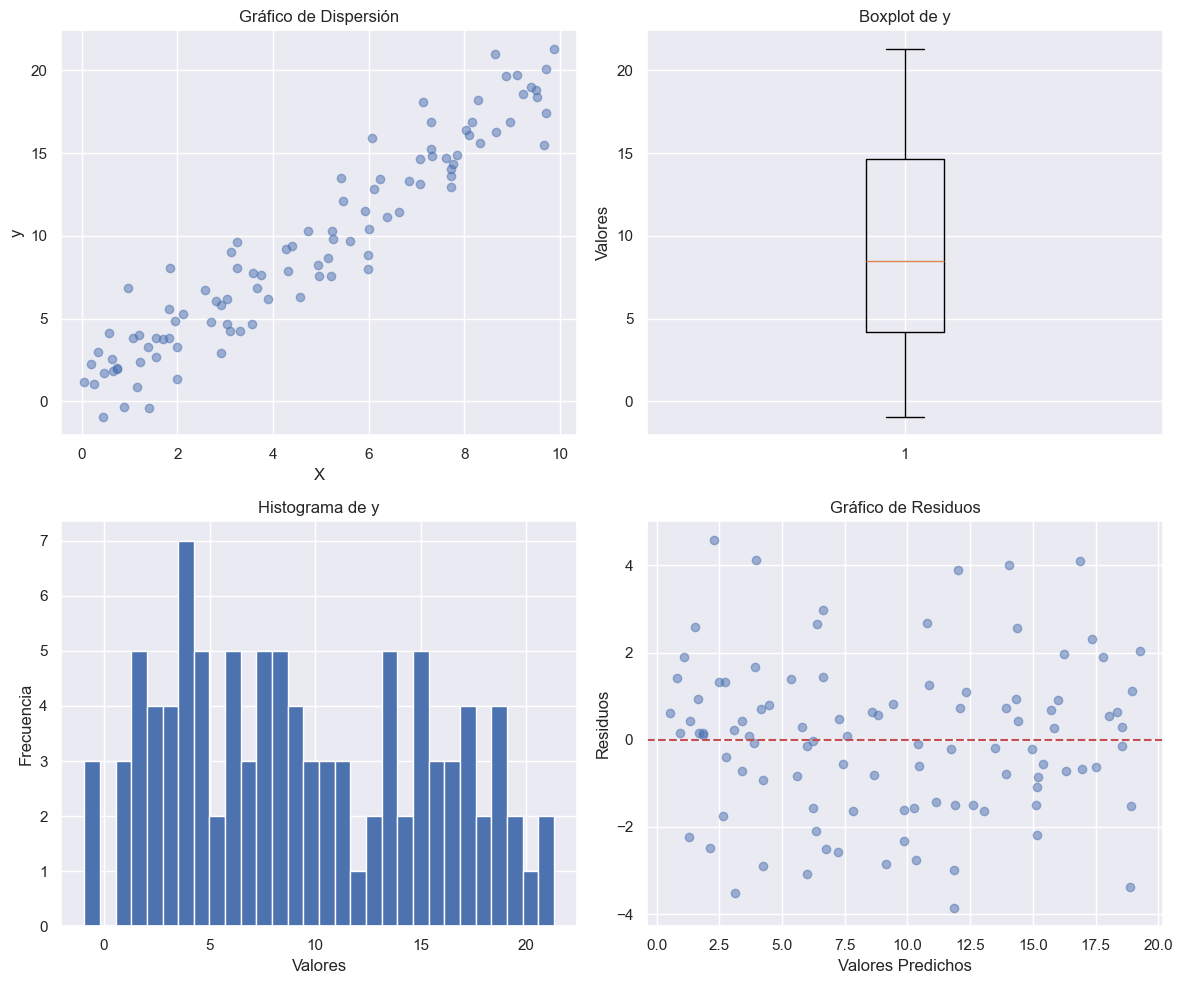


Estadísticas descriptivas de y:
Media: 9.40
Mediana: 8.46
Desviación estándar: 5.93
Valor mínimo: -0.93
Valor máximo: 21.30

Número de valores atípicos: 0
Límite inferior: -11.48
Límite superior: 30.34


In [46]:
import numpy as np
from visualizacion import visualizar_datos

# Generar datos de ejemplo (reemplaza esto con tus datos reales)
np.random.seed(42)
X = np.random.rand(100) * 10  # Variable predictora
y = 2 * X + np.random.randn(100) * 2  # Variable objetivo con ruido

# Visualizar los datos
visualizar_datos(X, y)

In [47]:
# Tus datos reales
X = tu_variable_predictora
y = tu_variable_objetivo

# Visualizar los datos
visualizar_datos(X, y)

NameError: name 'tu_variable_predictora' is not defined